In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load data
import pandas as pd

sessions = pd.read_csv('/content/drive/Shareddrives/207/prediction/prediction.csv') 

In [ ]:
print(sessions.describe())

        Unnamed: 0  matrix.rep.ID..length.session..ID...spks...  \
count  1196.000000                                  1196.000000   
mean    598.500000                                     3.065217   
std     345.399768                                     1.407366   
min       1.000000                                     1.000000   
25%     299.750000                                     2.000000   
50%     598.500000                                     3.000000   
75%     897.250000                                     4.000000   
max    1196.000000                                     5.000000   

       session..ID...contrast_left  session..ID...contrast_right        frate  \
count                  1196.000000                   1196.000000  1196.000000   
mean                      0.307065                      0.360995     2.857937   
std                       0.378328                      0.400134     1.204829   
min                       0.000000                      0.000000     0.4

In [ ]:
sessions.groupby(['session..ID...contrast_left','session..ID...contrast_right']).size().reset_index().rename(columns={0:'count'})


,session..ID...contrast_left,session..ID...contrast_right,count
0,0.00,0.00,327
1,0.00,0.25,50
2,0.00,0.50,84
3,0.00,1.00,130
4,0.25,0.00,33
5,0.25,0.25,30
6,0.25,0.50,40
7,0.25,1.00,86
8,0.50,0.00,83
9,0.50,0.25,40


In [ ]:
sessions.iloc[0]

Unnamed: 0                                     1.00000
matrix.rep.ID..length.session..ID...spks...    1.00000
session..ID...contrast_left                    1.00000
session..ID...contrast_right                   0.00000
frate                                          6.19382
session..ID...feedback_type                    1.00000
Name: 0, dtype: float64

In [ ]:
sessions.to_numpy().shape

(1196, 6)

In [ ]:
# convert to numpy and split data into training and testing sets
x_train = sessions.to_numpy()[100:,1:5]
y_train = (sessions.to_numpy()[100:,5] + 1) // 2

x_test = sessions.to_numpy()[:100,1:5]
y_test = (sessions.to_numpy()[:100,5] + 1) // 2


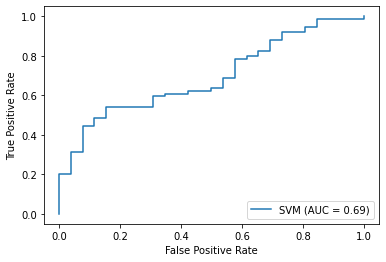

In [ ]:
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

clf = svm.SVC(probability=True)
clf.fit(x_train, y_train)
y_pred = clf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='SVM')
display.plot()
plt.show()


Best Threshold=0.765522, G-Mean=0.676
Best specificity=0.846154, sensitivity=0.541
              precision    recall  f1-score   support

         0.0       0.39      0.85      0.54        26
         1.0       0.91      0.54      0.68        74

    accuracy                           0.62       100
   macro avg       0.65      0.69      0.61       100
weighted avg       0.77      0.62      0.64       100



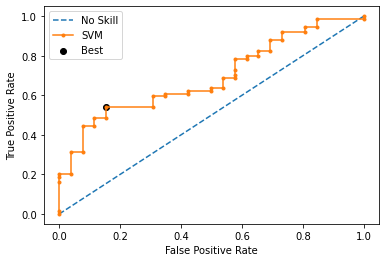

In [ ]:
# G-Mean = sqrt(Sensitivity * Specificity)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# find the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
print('Best specificity=%f, sensitivity=%.3f' % (1-fpr[ix], tpr[ix]))
y_pred_thred = (y_pred >= thresholds[ix]).astype(int)
print(metrics.classification_report(y_test, y_pred_thred))
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='SVM')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

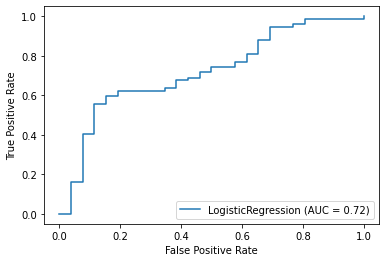

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='LogisticRegression')
display.plot()
plt.show()

Best Threshold=0.707630, G-Mean=0.709
Best specificity=0.846154, sensitivity=0.595
              precision    recall  f1-score   support

         0.0       0.42      0.85      0.56        26
         1.0       0.92      0.59      0.72        74

    accuracy                           0.66       100
   macro avg       0.67      0.72      0.64       100
weighted avg       0.79      0.66      0.68       100



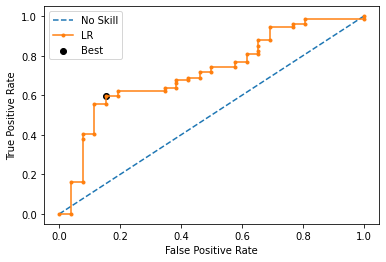

In [ ]:
# G-Mean = sqrt(Sensitivity * Specificity)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# find the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
print('Best specificity=%f, sensitivity=%.3f' % (1-fpr[ix], tpr[ix]))
y_pred_thred = (y_pred >= thresholds[ix]).astype(int)
print(metrics.classification_report(y_test, y_pred_thred))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='LR')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

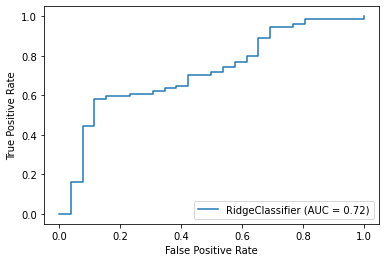

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

clf = RidgeClassifier(alpha=0.06)
clf.fit(x_train, y_train)
y_pred = clf._predict_proba_lr(x_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='RidgeClassifier')
display.plot()
plt.show()

Best Threshold=0.598492, G-Mean=0.717
Best specificity=0.884615, sensitivity=0.581
              precision    recall  f1-score   support

         0.0       0.43      0.88      0.57        26
         1.0       0.93      0.58      0.72        74

    accuracy                           0.66       100
   macro avg       0.68      0.73      0.65       100
weighted avg       0.80      0.66      0.68       100



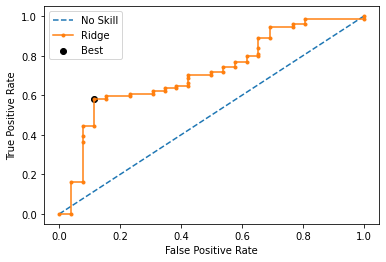

In [ ]:
# G-Mean = sqrt(Sensitivity * Specificity)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# find the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
print('Best specificity=%f, sensitivity=%.3f' % (1-fpr[ix], tpr[ix]))
y_pred_thred = (y_pred >= thresholds[ix]).astype(int)
print(metrics.classification_report(y_test, y_pred_thred))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Ridge')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
from pprint import pprint
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 35, 60, 85, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 325, 550, 775, 1000]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
##rf = RandomForestClassifier()
##rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=1, random_state=42, n_jobs=-1)
##rf_random.fit(x_train, y_train)
##rf_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'n_estimators': 325,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

Fitting 5 folds for each of 100 candidates, totalling 500 fits \\
{'n_estimators': 325, \\
 'min_samples_split': 10, \\
 'min_samples_leaf': 4, \\
 'max_features': 'sqrt', \\
 'max_depth': 10, \\
 'bootstrap': True}

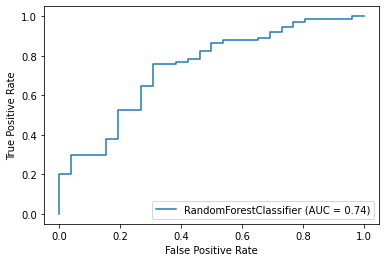

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

#Random forest with best parameters
clf = RandomForestClassifier(n_estimators=325, max_depth=10, n_jobs=-1, verbose=0, min_samples_leaf=4, min_samples_split=10, max_features='sqrt', bootstrap=True)
clf.fit(x_train, y_train)
y_pred = clf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='RandomForestClassifier')
display.plot()
plt.show()

Best Threshold=0.786459, G-Mean=0.724
Best specificity=0.692308, sensitivity=0.757
              precision    recall  f1-score   support

         0.0       0.50      0.69      0.58        26
         1.0       0.88      0.76      0.81        74

    accuracy                           0.74       100
   macro avg       0.69      0.72      0.70       100
weighted avg       0.78      0.74      0.75       100



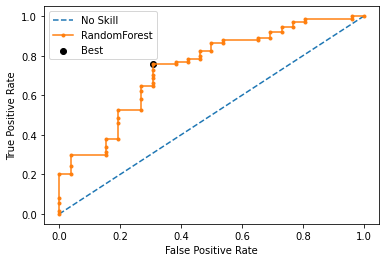

In [ ]:
# G-Mean = sqrt(Sensitivity * Specificity)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# find the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
print('Best specificity=%f, sensitivity=%.3f' % (1-fpr[ix], tpr[ix]))
y_pred_thred = (y_pred >= thresholds[ix]).astype(int)
print(metrics.classification_report(y_test, y_pred_thred))
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='RandomForest')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

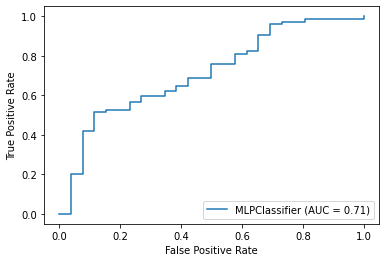

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

clf = MLPClassifier(max_iter=450, learning_rate='adaptive')
clf.fit(x_train, y_train)
y_pred = clf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='MLPClassifier')
display.plot()
plt.show()

Best Threshold=0.863287, G-Mean=0.674
Best specificity=0.884615, sensitivity=0.514
              precision    recall  f1-score   support

         0.0       0.39      0.88      0.54        26
         1.0       0.93      0.51      0.66        74

    accuracy                           0.61       100
   macro avg       0.66      0.70      0.60       100
weighted avg       0.79      0.61      0.63       100



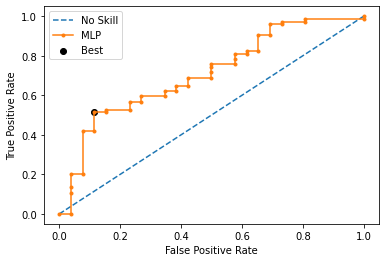

In [ ]:
# G-Mean = sqrt(Sensitivity * Specificity)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# find the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
print('Best specificity=%f, sensitivity=%.3f' % (1-fpr[ix], tpr[ix]))
y_pred_thred = (y_pred >= thresholds[ix]).astype(int)
print(metrics.classification_report(y_test, y_pred_thred))
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='MLP')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()